In [1]:
import torch # '2.0.0+cpu'
import torch.nn.functional as F # '2.0.0+cpu'
import matplotlib.pyplot as plt # '3.7.1'


this layer is useful for upsampling without deconvolution layers, we can do the upsampling inside a network with normal convolution layers followed by a pixell shuffle layer. This is useful for super resolution tasks.

In [4]:
batch_size = 1
in_channels = 1
upscale_factor = 2
C = in_channels * (upscale_factor ** 2)

H, W = 4, 4

lr_tensor = torch.randn(batch_size, C, H, W)

pixel_shuffle = torch.nn.PixelShuffle(upscale_factor) # this is the importante layer here

hr_tensor = pixel_shuffle(lr_tensor)

print("tensor base shape: ", lr_tensor.shape)
print("High-resolution tensor shape: ", hr_tensor.shape)

tensor base shape:  torch.Size([1, 4, 4, 4])
High-resolution tensor shape:  torch.Size([1, 1, 8, 8])


demonstration of its equivalence with transposed convolution

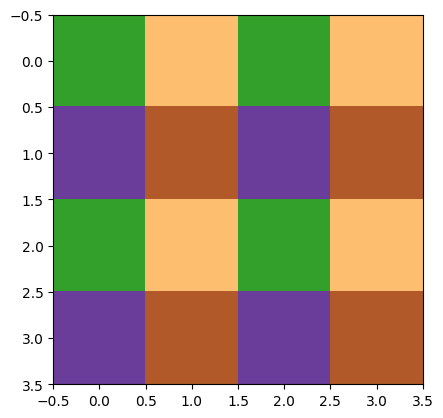

In [58]:
image = torch.ones(1, 1, 4, 4)


kernel_deconv = torch.tensor(
    [[1,2,1,2],
     [3,4,3,4],
     [1,2,1,2],
     [3,4,3,4]]
).float()

plt.imshow(kernel_deconv.numpy(), vmin=0, vmax=4, cmap='Paired')

In [92]:
image.shape

torch.Size([1, 1, 4, 4])

torch.Size([1, 1, 13, 13])


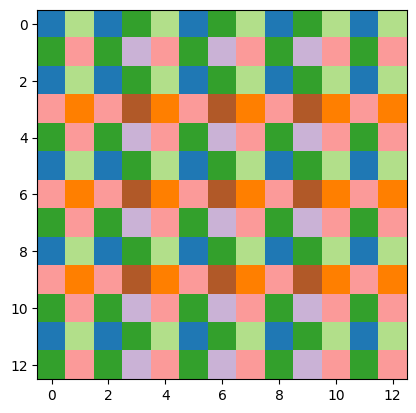

In [90]:
deconv = F.conv_transpose2d(image, kernel_deconv.unsqueeze(0).unsqueeze(0), stride=(3,3), padding=0)
print(deconv.shape)

plt.imshow(deconv.squeeze().numpy(), vmin=0, cmap='Paired')

In [80]:
deconv

tensor([[[[ 4.,  3.,  7.,  4.,  3.,  7.,  4.,  3.,  7.,  4.,  3.],
          [ 2.,  1.,  3.,  2.,  1.,  3.,  2.,  1.,  3.,  2.,  1.],
          [ 6.,  4., 10.,  6.,  4., 10.,  6.,  4., 10.,  6.,  4.],
          [ 4.,  3.,  7.,  4.,  3.,  7.,  4.,  3.,  7.,  4.,  3.],
          [ 2.,  1.,  3.,  2.,  1.,  3.,  2.,  1.,  3.,  2.,  1.],
          [ 6.,  4., 10.,  6.,  4., 10.,  6.,  4., 10.,  6.,  4.],
          [ 4.,  3.,  7.,  4.,  3.,  7.,  4.,  3.,  7.,  4.,  3.],
          [ 2.,  1.,  3.,  2.,  1.,  3.,  2.,  1.,  3.,  2.,  1.],
          [ 6.,  4., 10.,  6.,  4., 10.,  6.,  4., 10.,  6.,  4.],
          [ 4.,  3.,  7.,  4.,  3.,  7.,  4.,  3.,  7.,  4.,  3.],
          [ 2.,  1.,  3.,  2.,  1.,  3.,  2.,  1.,  3.,  2.,  1.]]]])

torch.Size([1, 1, 6, 6])


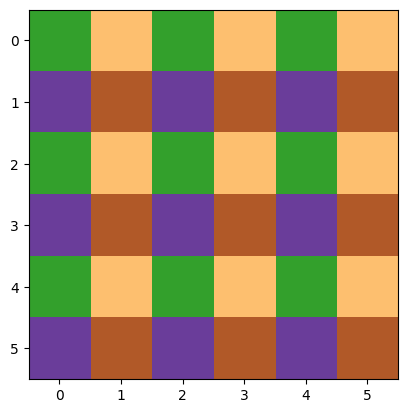

In [64]:
# now implement with a convolutional layer followed by a pixel shuffle layer
tensor1 = torch.ones(1, 2, 2)
tensor2 = torch.ones(1, 2, 2) * 2
tensor3 = torch.ones(1, 2, 2) * 3
tensor4 = torch.ones(1, 2, 2) * 4

# Concatenar los tensores a lo largo de una nueva dimensión
concatenated_tensor = torch.cat((tensor1, tensor2, tensor3, tensor4), dim=0)

result = F.conv2d(image, concatenated_tensor.unsqueeze(1), stride=1, padding=0)
pixel_shuffle = torch.nn.PixelShuffle(2)

deconv = pixel_shuffle(result)
print(deconv.shape)

plt.imshow(deconv.squeeze().numpy(), vmin=0, cmap='Paired')